# Install Dependencies/Necessary Libraries
---

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5 & pip install -r yolov5/requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15973, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 15973 (delta 87), reused 110 (delta 70), pack-reused 15831
Receiving objects: 100% (15973/15973), 14.54 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (10961/10961), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model
---

In [ ]:
# Downloads pretrained model from PyTorch hubs (we are downloading the smaller/lightweight model ('s' in 'yolov5s' stands for 'small'))
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model   # See the model

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-7 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 63.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Make Some Initial Detections
---

In [ ]:
# Sample image
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/master/pass/highway-traffic.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 325.8ms pre-process, 94.3ms inference, 39.1ms NMS per image at shape (1, 3, 480, 640)


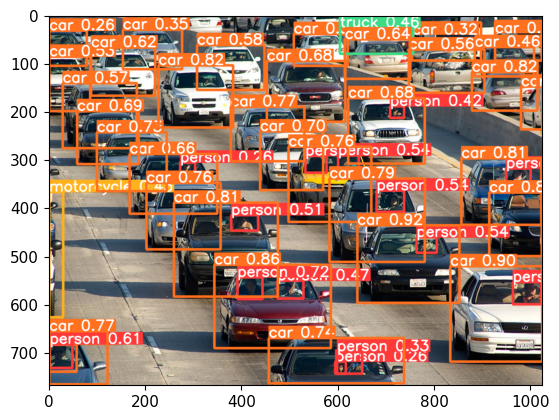

In [ ]:
# Render image with the results
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# This is the shape of our output
np.array(results.render()).shape  # hmm, looks like it's in this format (batch_size, height, width, color_channels)

(1, 768, 1024, 3)

# Train from Scratch
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import uuid     # Unique Identifier
import os
import time

In [ ]:
# IMAGES_PATH = '/content/drive/MyDrive/Colab\ Notebooks/Sheet_Audio/images'      # Takes this file path and create ../data/images
# labels = ['base_clef', 'bass_clef', 'crescendo_sign', 'diminuendo', 'diminuendo_sign', 'dotted_half_note', 'double_piano_sign', 'double_sharp_accidental', 'double_staccato', 'eighth_note', 'eighth_rest', 'flat', 'forte', 'fortissimo', 'grace_eighth_note', 'half_note', 'half_rest', 'marcato_sign', 'n_tuplet_sign', 'natural', 'note_head', 'quarter_note', 'quarter_rest', 'sforzato', 'sharp', 'sharp_accidental', 'sixteenth_note', 'sixteenth_rest', 'sixty_fourth_note', 'slur_sign', 'staccato', 'staff', 'thirty_second_note', 'tie_sign', 'treble_clef', 'trill_sign', 'whole_rest']
# num_images = 30

In [ ]:
!unzip Archive.zip

In [ ]:
!cd yolov5 && python /content/yolov5/train.py --img 1280 --batch 16 --epochs 100 --data /content/data.yaml --weights /content/yolov5s.pt --workers 0

train: weights=/content/yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-177-g89c3040 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

# Lead Custom Model
---

In [ ]:
custom_model = torch.hub.load("ultralytics/yolov5", 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-7 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [ ]:
test_img = '/content/images/Bartok-Solo-Violin-Sonata-mvt-4-018_png.rf.4147478c235a4bc79290b227ce8ebeea.jpg'
test_result = custom_model(test_img)

In [ ]:
test_result.print()

image 1/1: 512x512 12 note_heads
Speed: 9.0ms pre-process, 12.0ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


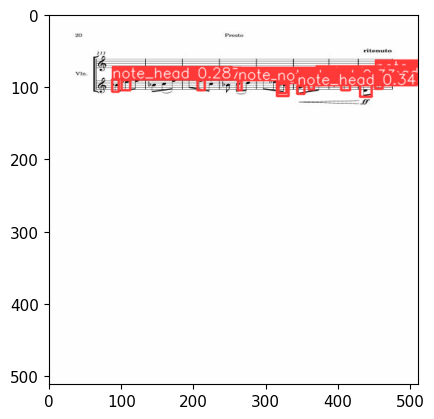

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_result.render()))
plt.show()